In [2]:

import numpy as np
import matplotlib.pyplot as plt
import cv2


In [4]:
def ploteo_complejo(mat, indicador,escala):
    if(indicador=="I"):
        mat=np.abs(mat)**2
    elif(indicador=="A"):
        mat=np.abs(mat)
    elif(indicador=="P"):
        mat=no.angle(mat)
    
    if(escala==1):
        plt.figure()
        plt.imshow(mat)
        plt.show()
        
    else:
        plt.figure()
        plt.imshow(np.log(mat+0.00001))
        plt.show()
        
    return 0

In [5]:

#importando imag
img=cv2.imread('b.png',0)
fft_img_prev=np.fft.fftn(img)
fft_img=np.fft.fftshift(fft_img_prev)

fft_inv=np.fft.ifft2(fft_img)


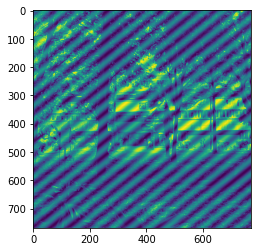

In [6]:
#%matplotlib qt
plt.figure()
plt.imshow(img)
#plt.colorbar()
plt.show()

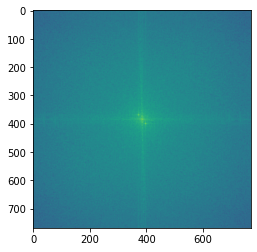

0

In [7]:
ploteo_complejo(fft_img, "I",0)

384


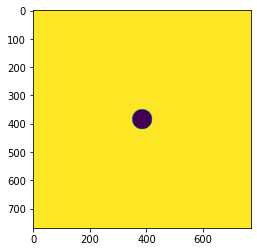

In [9]:
#mascara circular
mask2= np.ones(np.shape(img), dtype="uint8")

coordy=int(np.shape(img)[0]/2)
coordx=int(np.shape(img)[1]/2)
print(coordx)

cv2.circle(mask2,(coordx, coordy), 35,0,-1)
plt.figure()
plt.imshow(mask2)
plt.show()

In [10]:
new_imag=np.fft.fftn(mask2*fft_img) #filtrado bajas frecuencias

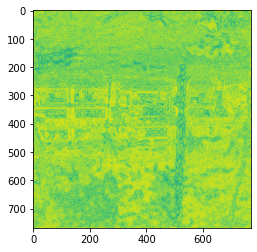

In [11]:
ploteo_complejo(new_imag, "I",0);

In [41]:
fft_inv1=np.fft.ifftshift(new_imag)

In [67]:
mask3=np.ones((768,768),dtype="uint8")
cv2.circle(mask3,(370,370),10,0,-1);
cv2.circle(mask3,(400,400),10,0,-1);


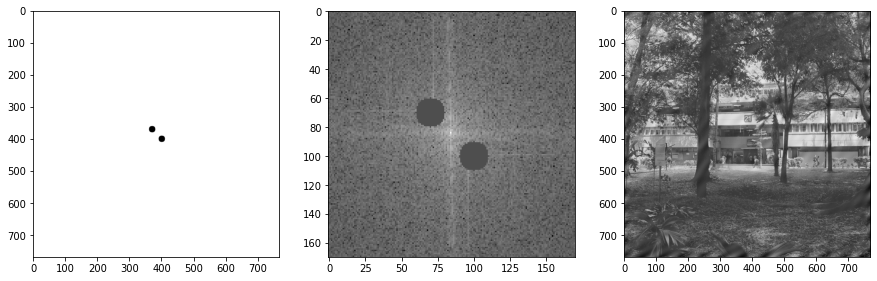

In [74]:
fig2, img2 = plt.subplots(1,3,figsize=(15, 15))
img2[0].imshow(mask3,cmap="gray")
masckfft= mask3*fft_img
img2[1].imshow(np.log(np.abs(masckfft+10000))[300:470, 300:470],cmap="gray")
img2[2].imshow((np.abs((np.fft.ifft2(masckfft)))),cmap="gray")
plt.show()